# Intro 

### Libraries

In [1]:
#Different libraries that we need 

import numpy as np # numerical python for operations on arrays, matrix
import pandas as pd # very efficient for handling databases 
import matplotlib.pyplot as plt # for graphs 
import glob # for accessing directories (where the data are)
from scipy import stats # scientific python - for special functions and probability densities 
import re # for regular expressions 
import math # for handgling with trigonometric functions 


# in order to plot inline, Jupyter Notebook only 

In [2]:
%matplotlib notebook

### Self-made functions

In [3]:
# We are using this function in order to get the food angle with respect to the center of the maze 
# To be short : polar coordinates angle from cartesian coordinates 
# We need this angle in order to perform vector arithmetic to get current position to food vector 

def angle_from_position(x_coordinate,y_coordinate):
    if math.degrees(math.atan2(x_coordinate, y_coordinate)) >= 0 : 
        return float("{0:.2f}".format(math.degrees(math.atan2(x_coordinate, y_coordinate)))) 
    else : 
        return (360 + float("{0:.2f}".format(math.degrees(math.atan2(x_coordinate, y_coordinate)))))


In [4]:
# Angle by cosine theorem (trygonometry) : actually rotated angle 
# Look at my notes
def rot_angle_cosine_theorem(side1, side2 ,side3, angle):
    return (angle + np.degrees(np.arccos((side2*side2 + side3*side3 - side1*side1 )/(2*side2*side3)))) 

## Importing Data from .csv files

In [5]:
# Import all the .csv files 
trackFiles = []
trackFiles = glob.glob('C:/Users/jamesjun/Desktop/TrackFiles/CsvFinal/Shuffle/Tracks/*.csv')

shapeFiles = []
shapeFiles = glob.glob('C:/Users/jamesjun/Desktop/TrackFiles/CsvFinal/Shuffle/Shapes/*.csv')

relationsFiles = [] 
relationsFiles = glob.glob('C:/Users/jamesjun/Desktop/TrackFiles/CsvFinal/Shuffle/Relations/*.csv')

In [6]:
# Filtering probe trials 
# if probeFilter = True, probetrials are not used in the future statistics
# if probeFilter = False, probetrials are going to take part in the stats
probeFiles = []

probeFilter = True 

if probeFilter == True:
    regExpr = re.compile(r'p_Track')
    regExpr2 = re.compile(r'p_shape')
    regExpr3 = re.compile(r'p_relations')
    
    probeFiles = list(filter(lambda i : regExpr.search(i), trackFiles))
    trackFiles = list(filter(lambda i : not regExpr.search(i), trackFiles))
    shapeFiles = list(filter(lambda i : not regExpr2.search(i), shapeFiles))
    relationsFiles = list(filter(lambda i : not regExpr3.search(i), relationsFiles))
    
    
else : 
    trackFiles = trackFiles 
    shapeFiles = shapeFiles
    relationsFiles = relationsFiles 

In [7]:
# Creating list of tracking Data as list of pandas dataframes 
trackData = []
for i in range(0,len(trackFiles)) : 
    trackData.append(pd.read_csv(trackFiles[i], names = ["Time", "X", "Y", "HeadAngle"]))
    

In [8]:
#Adding landmark name and color in order to create a new dataframe for shapes
landm_name = {'Shape': ['Triangle Lg', 'Triangle Sm',  'Square Lg', 'Square Sm', 'Circle Lg', 'Circle Sm', 'Food']} 
shape_names = pd.DataFrame(data = landm_name)

color_shapes = pd.DataFrame(data = np.linspace(0,1,7), columns= ['Color'])

In [9]:
shapeData = []
for i in range(0,len(shapeFiles)) : 
    shapeData.append(pd.read_csv(shapeFiles[i], names = ["X", "Y", "Angle"]))
    shapeData[i] = pd.concat([shape_names,shapeData[i]], axis = 1)
    shapeData[i] = pd.concat([shapeData[i], color_shapes], axis = 1)

In [10]:
relationsData = []
for i in range(0, len(relationsFiles)):
    relationsData.append(pd.read_csv(relationsFiles[i], names = ["Time", "FoodDistance", "HeadingAngleError", "BoolLT", "BoolST" ,
                                        "BoolLS", "BoolSS", "BoolLC", "BoolSC", "BoolFood"]))

In [11]:
# Creating list of probe Data as list of pandas dataframes 
probeData = []
for i in range(0,len(probeFiles)) : 
    probeData.append(pd.read_csv(probeFiles[i], names = ["Time", "X", "Y", "HeadAngle"]))
    

In [12]:
#Quick check 
len(trackData) 

412

In [13]:
len(shapeData) 

412

In [14]:
len(relationsFiles)

327

# Initial Heading Distributions

## Initial Heading Angle Distribution -- Late learning Trials

In [15]:
# Extracting every first row from each trackData dataframe using iloc 
# ref  : (https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/#iloc-selection)
IOPDistrib = pd.concat([trackData[i].iloc[[0]].drop(columns = ['Time']) for i in range(141, len(trackData))]) 

In [16]:
# Plotting the histogram 
IOPDistrib.hist(column = 'HeadAngle', bins = 10, figsize=(4,4))

<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000A3AEBF550>]],
      dtype=object)

## Initial Heading Magnitude Distribution - Late Learning Trials

In [43]:
# Getting initial position vectors 
initialPositionVector = []

for i in range(0,len(positionVector)):
    initialPositionVector.append(positionVector[i].drop(positionVector[i].index[[0,1]]))

# Distribution of initial position as pandas dataframe (very efficient)
IPVDistribution = pd.concat(initialPositionVector[i].iloc[[0]].drop(columns = ['HeadAngle','Time']) for i in range(141,len(trackData)))

<IPython.core.display.Javascript object>


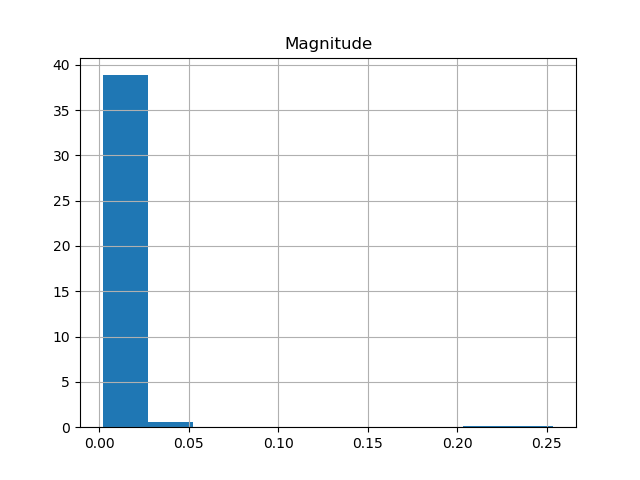

'\n# Gaussian Distribution Fitting \nxt = plt.xticks()[0]  \nxmin, xmax = min(xt), max(xt)  \nlnspc = np.linspace(xmin, xmax, len(IPVDistribution[\'Magnitude\']))\n\nm, s = stats.norm.fit(IPVDistribution[\'Magnitude\']) # get mean and standard deviation  \npdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  \nplt.plot(lnspc, pdf_g, label="Norm") # plot it\n'

In [44]:
# Plotting the distribution as a histogram 
IPVDistribution.hist(column = 'Magnitude', bins = 10
                     , density = True)

'''
# Gaussian Distribution Fitting 
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(IPVDistribution['Magnitude']))

m, s = stats.norm.fit(IPVDistribution['Magnitude']) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
'''

# Plotting Trajectories 
### Plotting an Example trajectory (it can be done for every trajectory)

<IPython.core.display.Javascript object>


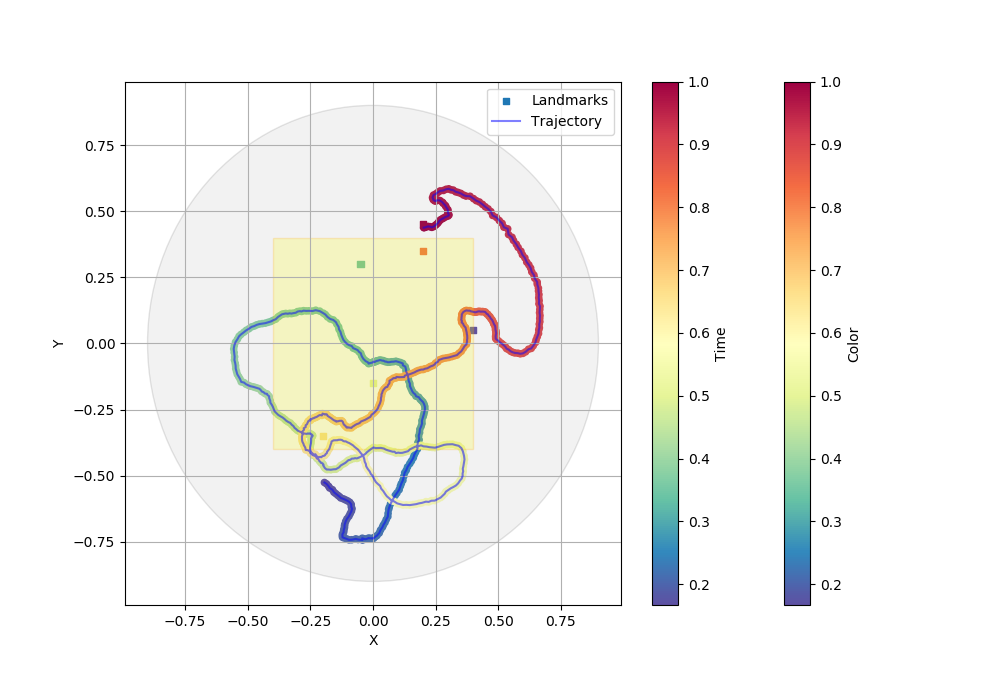

In [45]:
import matplotlib.patches as patches

#Select trajectory number (based on number of videos = 444)
traj_number = 200

# Plotting each trajectory with Spectral colormap based on time --> as James did in matlab 
# The colormap is related to time --> take a look on the side of the plot 


#plt.figure()
fig, ax = plt.subplots()
circ = patches.Circle((0, 0), 0.9, alpha=0.10, fc='grey', edgecolor = 'black')
square_plot = patches.Rectangle((-0.4,-0.4), 0.8, 0.8, alpha = 0.2, fc = 'yellow', edgecolor = 'orange')


ax.add_patch(circ)
ax.add_patch(square_plot)

# Setting positions of landmarks and trajectory points 
shapeData[traj_number].plot.scatter(x = "X", y = 'Y',ax = ax, marker = 's',style = 'o', label = 'Landmarks', c = 'Color', cmap = 'Spectral_r')
trackData[traj_number].plot.scatter(x = "X", y = 'Y',ax = ax,c = 'Time', cmap = 'Spectral_r')

# Adding polygonal chain in order to see the trajectory and get vector length later 
trackData[traj_number].plot.line(x = "X", y = 'Y', ax = ax, style = 'b', alpha = 0.5, grid = True, figsize = (10,6.8), label = 'Trajectory')


In [48]:
import matplotlib.path as mplPath
#Defining square in order to get when the fish is inside the interests zone 
square = np.array([[-0.4,-0.4], [-0.4,0.4], [0.4,0.4], [0.4,-0.4]])# poly
squarePath = mplPath.Path(square)


In [49]:
r = 0.001 # accuracy

ActiveZoneList = []
for i in range(0,len(trackData)):
    pnts = trackData[i].drop(columns = ['Time','HeadAngle']).values # points on edges
    isIn = [ squarePath.contains_point(pnt,radius=r) or squarePath.contains_point(pnt,radius=-r) for pnt in pnts]
    ArrayIsIn = np.asarray(isIn)
    df = pd.DataFrame(data = ArrayIsIn)
    df.columns = ['ActiveZone']
    ActiveZoneList.append(df)

In [50]:
# Index of first position inside the zone of interest 
# We're gonna use it to get new trackData dataframes filtered from the first 
# position into zone of interest 
indexFilter = [] 
for i in range(0,len(ActiveZoneList)):
    indexFilter.append(ActiveZoneList[i].index[ActiveZoneList[i]['ActiveZone'] == True].tolist()[0])

In [51]:
# New dataframe with first position filtered
# N.B index reset 
DecisionData = []
for i in range(0,len(trackData)):
    DecisionData.append(trackData[i].iloc[indexFilter[i]:-1])
    DecisionData[i] = DecisionData[i].reset_index(drop = True)

# Vector magnitude and angle

## Position Vector (time dependent) -- Whole Dataset



In [52]:
# Getting the difference between coordinates (x,y) in order to get the magnitude
# List of Dataframes
difference = []

for i in range(0,len(trackData)):
    pivotVar = trackData[i].diff().drop(columns = ['HeadAngle'])
    difference.append(pivotVar.drop(pivotVar.index[0]))
    
# Getting magnitude as norm (np.linalg.norm)
magnitude = []

# Getting 

for i in range(0,len(difference)):
    magnitude.append(difference[i][['X' , 'Y']].apply(lambda x : np.linalg.norm(x) , axis = 1).to_frame())
    magnitude[i].columns = ['Magnitude']

In [53]:
# Getting angle 
angle = []
for i in range(0,len(trackData)):
    pivotVar = trackData[i].drop(columns = ['Time','X', 'Y'] )
    angle.append(pivotVar.drop(pivotVar.index[0]))

In [54]:
# Getting Time
time = []
for i in range(0,len(difference)):
    time.append(difference[i].drop(columns = ['X', 'Y']))

In [55]:
# Getting final dataframe --> vector features
positionVector = []
pivotDataframe = []

for i in range(0,len(magnitude)):
    pivotDataframe.append(pd.merge(magnitude[i], angle[i], left_index= True, right_index = True))
    positionVector.append(pd.merge(pivotDataframe[i], time[i], left_index= True, right_index = True))
    

In [56]:
# VectorMagnitude Distribution
# Take a look at the Learning Curve to set range(latetrials) 
PMDistribution = pd.concat([positionVector[i] for i in range(141, len(trackData))]) 

# Magnitude Distribution
PMDistribution.hist(column= 'Magnitude', bins = 100 ,density = True)
plt.title('Position Vector Magnitude')

'''
# Gaussian Distribution Fitting 
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(PMDistribution['Magnitude']))

m, s = stats.norm.fit(PMDistribution['Magnitude']) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, 0.0081, 0.007) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
 '''
plt.xlim((-0.01,0.10))

<IPython.core.display.Javascript object>

(-0.01, 0.1)

In [57]:
# Angle Distribution --> seems to be quite constant 
PMDistribution.hist(column= 'HeadAngle', bins = 100)
plt.title('Position Vector Angle')

<IPython.core.display.Javascript object>

Text(0.5,1,'Position Vector Angle')

## Velocity vector -- Whole dataset

In [58]:
# Getting difference between two subsequent positions --> differential geometry velocity
posDifference = []

for i in range(0,len(positionVector)):
    pivotVar = positionVector[i].diff().drop(columns = ['HeadAngle', 'Time'])
    posDifference.append(pivotVar.drop(pivotVar.index[0]))

In [59]:
# Time difference between two subsequent positions 
timeDifference = []
for i in range(0,len(time)):
    timeDifference.append(time[i].drop(time[i].index[0]))

In [60]:
# Setting velocity vector
velocityVector = [] 
for i in range(0,len(posDifference)):
    pivotVar = pd.merge(posDifference[i], timeDifference[i], left_index= True, right_index = True)
    velocityVector.append(pivotVar.rename(columns = {'Magnitude' : 'PosDifference'}))
    

# Getting velocity as differential geometry definition
# Getting magnitude
velocity = []
for i in range(0,len(velocityVector)):
    pivotVar = velocityVector[i]['PosDifference']/velocityVector[i]['Time']
    velocity.append(pivotVar.apply(lambda x : np.linalg.norm(x)).to_frame())
    velocity[i].columns = ['Velocity']
    
for i in range(0,len(velocityVector)):
# Final velocity Dataframe 
    velocityVector[i] = pd.merge(velocityVector[i], velocity[i], left_index= True, right_index = True)


In [61]:
# Velocity Magnitude Distribution 
VMDistribution = pd.concat([velocityVector[i] for i in range(141, len(trackData))])

# Handle exceptions (like infinity - sometimes the fish was static)
VMDistribution = VMDistribution.fillna(value = 0 )
VMDistribution = VMDistribution.replace(np.inf, 0)
VMDistribution = VMDistribution.replace(-np.inf, 0)

# Histogram / density = true , means normalized data 
VMDistribution.hist(column= 'Velocity', bins = 600, density = True, figsize= (8,8))
plt.title('Velocity Vector Magnitude')


# Exponential fitting  / Half normal Distribution Fitting 
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(VMDistribution['Velocity']))
plt.xlim((-0.01,0.4))

loc, scale = stats.expon.fit(VMDistribution['Velocity']) # get mean and standard deviation  
pdf_expon = stats.expon.pdf(lnspc
                            ,loc , scale) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_expon, label="Exponential") # plot it


lochn, scalehn = stats.halfnorm.fit(VMDistribution['Velocity']) # get mean and standard deviation  
pdf_hnorm = stats.halfnorm.pdf(lnspc
                            ,lochn , 0.0335) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_hnorm, label="HalfNormal") # plot it

plt.legend(bbox_to_anchor=(0.99, 0.99), loc=0, borderaxespad=0.)

<IPython.core.display.Javascript object>

# Food - Position Vector

In [64]:
# Food Angle From Origin (center of the maze)
FAFromOrigin = []

for i in range(0, len(shapeData)): 
    FAFromOrigin.append(angle_from_position(shapeData[i].at[6, 'X'], shapeData[i].at[6, 'Y']))


In [65]:
OPAngles = []

for i in range(0, len(trackData)):
    OPAngles.append(angle_from_position(trackData[i].columns['X'],trackData[i].columns['Y']))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [66]:
# Adding column of F-O Angle in every trackDataDataframe
# list of dataframes withFAFromOrigin as values 
FOAngleDf = []


for j in range(0,len(trackData)):
    food_angle_value_array = np.full((len(trackData[j]), 1), FAFromOrigin[j])
    FOAngleDf.append(pd.DataFrame(food_angle_value_array, columns = ['FOAngle']))
    

In [67]:
# New trackData Dataframe, with Food - Origin angle 
for i in range(0,len(trackData)):
    trackData[i] = pd.concat([trackData[i], FOAngleDf[i]], axis = 1 )
    

In [68]:
# Adding Position to Food angle (frame of reference : fish's head)
for i in range(0,len(trackData)):
    trackData[i]['PFAngle'] = np.where((trackData[i]['FOAngle'] - trackData[i]['OP']) >= 0,(trackData[i]['FOAngle'] - trackData[i]['OP']),
                                       (360 + trackData[i]['FOAngle'] - trackData[i]['OP']) )

KeyError: 'OP'

In [69]:
# Getting Position to Food angle distribution 
PFAngleDistribution = pd.concat([trackData[i] for i in range(141, len(trackData))])
PFAngleDistribution = PFAngleDistribution.drop(columns=['Time','X','Y','OP','FOAngle'])
PFAngleDistribution.hist(column='PFAngle', bins = 360, figsize=(8,8))

KeyError: "['PFAngle'] not in index"

In [70]:
# Getting OP Magnitude in order to get HeadVector Angle (cosine theorem from trigonometry)
for i in range(0,len(trackData)):
    trackData[i]['OPMagnitude'] = trackData[i][['X' , 'Y']].apply(lambda x : np.linalg.norm(x) , axis = 1).to_frame()
    trackData[i]['OPMagnitude1'] = trackData[i]['OPMagnitude'].shift(1)
    trackData[i].fillna(0, inplace = True)

In [71]:
for i in range(0,len(trackData)):
    trackData[i] = pd.concat([trackData[i], magnitude[i]], axis = 1)
    trackData[i].fillna(0, inplace = True)
    

In [72]:
for i in range(0,len(trackData)):   
    trackData[i]['OP1'] = trackData[i]['OP'].shift(1)
    trackData[i].fillna(0, inplace = True)

KeyError: 'OP'

In [ ]:
for i in range(0,len(trackData)):
    trackData[i]['HVAngle'] = rot_angle_cosine_theorem(trackData[i]['OPMagnitude'],trackData[i]['OPMagnitude1'],
                                                       trackData[i]['Magnitude'], trackData[i]['OP1'] )
    trackData[i].fillna(0, inplace = True)
    trackData[i]['HVAngle'] = np.where((trackData[i]['HVAngle'] >= 360),
                                       (trackData[i]['HVAngle'] - 360),  trackData[i]['HVAngle'] )

In [ ]:
trackDataNo0 = []
for i in range(0,len(trackData)):
    trackDataNo0.append(trackData[i].iloc[1:])
    

In [ ]:
HVAngleDistribution = pd.concat([trackDataNo0[i] for i in range(141, len(trackDataNo0))])

HVAngleDistribution = HVAngleDistribution.drop(columns=['Time','X','Y','OP','FOAngle','PFAngle','OPMagnitude','Magnitude'
                                                        ,'OPMagnitude1','OP1'])

HVAngleDistribution.hist(column='HVAngle', bins = 360, figsize=(8,8)) 

In [ ]:
a = 0 
for i in range(0,len(trackDataNo0)):
    a = a + trackDataNo0[i].loc[trackDataNo0[i].HVAngle == 0 , 'HVAngle' ].count()
    
print(a)

# Probe Data

## Distance Bar Plots 

In [ ]:
posDifferenceProbe = []
for i in range(0,len(probeData)):
    pivotVar = probeData[i].diff().drop(columns = ['HeadAngle', 'Time'])
    posDifferenceProbe.append(pivotVar.drop(pivotVar.index[0]))

distanceProbe = []
for i in range(0,len(posDifferenceProbe)):
    distanceProbe.append(posDifferenceProbe[i][['X' , 'Y']].apply(lambda x : np.linalg.norm(x) , axis = 1).to_frame())
    distanceProbe[i].columns = ['distanceProbe']

distanceTotProbe = []
for i in range(0,len(distanceProbe)):
    distanceTotProbe.append(distanceProbe[i].sum())
    distanceTotProbe[i] = distanceTotProbe[i][0]

distanceTotProbe = np.asarray(distanceTotProbe)

In [ ]:
posDifferenceEarly = []
for i in range(0,19):
    pivotVar = trackData[i].diff().drop(columns = ['HeadAngle', 'Time'])
    posDifferenceEarly.append(pivotVar.drop(pivotVar.index[0]))

distanceEarly = []
for i in range(0,len(posDifferenceEarly)):
    distanceEarly.append(posDifferenceEarly[i][['X' , 'Y']].apply(lambda x : np.linalg.norm(x) , axis = 1).to_frame())
    distanceEarly[i].columns = ['distanceEarly']

distanceTotEarly = []
for i in range(0,len(distanceEarly)):
    distanceTotEarly.append(distanceEarly[i].sum())
    distanceTotEarly[i] = distanceTotEarly[i][0]

distanceTotEarly = np.asarray(distanceTotEarly)

In [ ]:
posDifferenceLate = []
for i in range(173,len(trackData)):
    pivotVar = trackData[i].diff().drop(columns = ['HeadAngle', 'Time'])
    posDifferenceLate.append(pivotVar.drop(pivotVar.index[0]))

distanceLate = []
for i in range(0,len(posDifferenceLate)):
    distanceLate.append(posDifferenceLate[i][['X' , 'Y']].apply(lambda x : np.linalg.norm(x) , axis = 1).to_frame())
    distanceLate[i].columns = ['distanceLate']

distanceTotLate = []
for i in range(0,len(distanceLate)):
    distanceTotLate.append(distanceLate[i].sum())
    distanceTotLate[i] = distanceTotLate[i][0]

distanceTotLate = np.asarray(distanceTotLate)

In [ ]:
objects = ('Early', 'Late', 'Probe')
y_pos = np.arange(len(objects))
distance = [distanceTotEarly.mean(), distanceTotLate.mean(), distanceTotProbe.mean()]
distance_std = [distanceTotEarly.std()/(np.sqrt(len(distanceTotEarly))), distanceTotLate.std()/(np.sqrt(len(distanceTotLate))),
                distanceTotProbe.std()/(np.sqrt(len(distanceTotProbe)))]

plt.figure(0)
plt.bar(y_pos, distance, yerr = distance_std,align = 'center', alpha =1, capsize = 8 )
plt.grid()
plt.xticks(y_pos, objects)
plt.ylabel('Path Length (m)')
plt.title('Bar Plots Distance')
plt.savefig('DistanceBars.jpg')


## Time Bar Plots 

In [ ]:
durationEarly = []

for i in range(0,19):
    durationEarly.append(trackData[i].iloc[-1]['Time'] - trackData[i].iloc[0]['Time'])
    
durationEarly = np.asarray(durationEarly)

In [ ]:
durationLate = []

for i in range(173,len(trackData)):
    durationLate.append(trackData[i].iloc[-1]['Time'] - trackData[i].iloc[0]['Time'])

durationLate = np.asarray(durationLate)

In [ ]:
durationProbe = []

for i in range(0,len(probeData)):
    durationProbe.append(probeData[i].iloc[-1]['Time'] - probeData[i].iloc[0]['Time'])
    
durationProbe = np.asarray(durationProbe)

In [ ]:
objects1 = ('Early', 'Late', 'Probe')
y_pos1 = np.arange(len(objects1))
duration = [durationEarly.mean(), durationLate.mean(), durationProbe.mean()]
duration_std = [durationEarly.std()/(np.sqrt(len(durationEarly))), durationLate.std()/(np.sqrt(len(durationLate))),
                durationProbe.std()/(np.sqrt(len(durationProbe)))]

plt.figure(1)
plt.bar(y_pos1, duration, yerr = duration_std,align = 'center', alpha = 1, capsize = 8 )
plt.xticks(y_pos1, objects1)
plt.grid()
plt.ylabel('Duration (s)')
plt.title('Bar Plots Time')
plt.savefig('DurationBars.jpg')
